In [1]:
import pandas as pd
import numpy as np

# Define the column names
column_names = [
    "Class",
    "Alcohol",
    "Malic_Acid",
    "Ash",
    "Alcalinity_of_Ash",
    "Magnesium",
    "Total_Phenols",
    "Flavanoids",
    "Nonflavanoid_Phenols",
    "Proanthocyanins",
    "Color_Intensity",
    "Hue",
    "OD280_OD315",
    "Proline"
]

# Specify the file path
file_path = "wine/wine.data" 
wine_df = pd.read_csv(file_path, header=None, names=column_names)

labels = wine_df["Class"]  # Assuming "Class" is the label column
targets = wine_df.drop(columns=["Class"])

labels = labels.values
targets = targets.values

In [4]:
# Assuming eigenvalues and eigenvectors are already computed
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)
k = np.argmax(cumulative_variance >= 0.95) + 1  # Add 1 because indexing starts from 1
print(k)

11


In [5]:
# Step 1: Data Standardization
standardized_data = (targets - np.mean(targets, axis=0)) / np.std(targets, axis=0)

# Step 2: Calculate Covariance Matrix
cov_matrix = np.cov(standardized_data, rowvar=False)

# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort Eigenvalues and Select Principal Components
sorted_indices = np.argsort(eigenvalues)[::-1]
k = 11
selected_indices = sorted_indices[:k]  # Set k to the desired number of dimensions
principal_components = eigenvectors[:, selected_indices]

# Step 5: Project the Data
pca_result = np.dot(standardized_data, principal_components)

# You can now use 'pca_result' as your reduced-dimensional representation of the data.

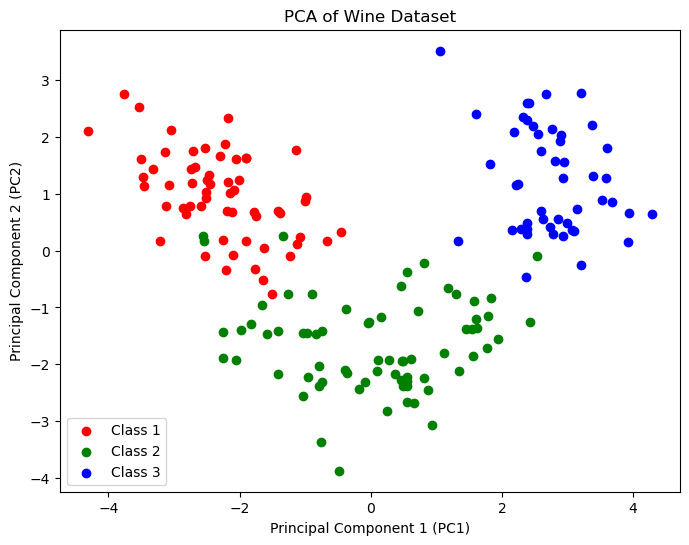

In [7]:
import matplotlib.pyplot as plt

# Plot the 2D scatter plot
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']  # Adjust the colors based on your classes

for idx, label in enumerate(np.unique(labels)):
    subset_indices = labels == label
    plt.scatter(pca_result[subset_indices, 0], pca_result[subset_indices, 1], c=colors[idx], label=f'Class {int(label)}')

plt.title('PCA of Wine Dataset')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()